# Passo 1: Importando os modulos necessários

In [2]:
import pandas as pd
import datetime
import yfinance as yf
from matplotlib import pyplot as plt
import mplcyberpunk
import smtplib
from email.message import EmailMessage

# Passo 2: Pegar dados no Yahoo Finance

In [7]:
ativos = ['^BVSP', 'BRL=X']

hoje = datetime.datetime.now()
um_ano_atras = hoje - datetime.timedelta(days = 365)

dados_mercado = yf.download(ativos, um_ano_atras, hoje)


display(dados_mercado)

[*********************100%***********************]  2 of 2 completed


Adj Close             Close                High             
               BRL=X     ^BVSP   BRL=X     ^BVSP     BRL=X     ^BVSP   
Date                                                                   
2022-04-04    4.6572  121280.0  4.6572  121280.0  4.670100  121570.0  \
2022-04-05    4.5938  118885.0  4.5938  118885.0  4.669100  121628.0   
2022-04-06    4.6507  118228.0  4.6507  118228.0  4.712600  118885.0   
2022-04-07    4.7152  118862.0  4.7152  118862.0  4.769900  119247.0   
2022-04-08    4.7521  118322.0  4.7521  118322.0  4.791300  118868.0   
...              ...       ...     ...       ...       ...       ...   
2023-03-28    5.1971  101185.0  5.1971  101185.0  5.197700  101559.0   
2023-03-29    5.1644  101793.0  5.1644  101793.0  5.182300  102213.0   
2023-03-30    5.1342  103713.0  5.1342  103713.0  5.155928  104085.0   
2023-03-31    5.0927  101882.0  5.0927  101882.0  5.103300  104041.0   
2023-04-03    5.0623  101506.0  5.0623  101506.0  5.075500  101916.0   

                 Low              Open           Volume              
               BRL=X     ^BVSP   BRL=X     ^BVSP  BRL=X       ^BVSP  
Date                                                                 
2022-04-04  4.604057  120754.0  4.6572  121569.0      0   8812500.0  
2022-04-05  4.575500  118794.0  4.5938  121279.0      0  11788300.0  
2022-04-06  4.647900  116791.0  4.6507  118885.0      0  13410800.0  
2022-04-07  4.690400  117509.0  4.7152  118226.0      0  11520100.0  
2022-04-08  4.707518  117487.0  4.7521  118861.0      0  11225800.0  
...              ...       ...     ...       ...    ...         ...  
2023-03-28  5.147900   99488.0  5.1971   99672.0      0  13500100.0  
2023-03-29  5.131730  100248.0  5.1644  101185.0      0  12456100.0  
2023-03-30  5.077300  101796.0  5.1342  101796.0      0  14901600.0  
2023-03-31  5.055200  101476.0  5.0927  103714.0      0  15111200.0  
2023-04-03  5.036216  100651.0  5.0623  101883.0      0  12794800.0  

[261 rows x 12 columns]

# Passo 3.1: Manipulando os dados - seleção e exclusão de dados

In [8]:
dados_fechamento = dados_mercado['Adj Close']
dados_fechamento.columns = ['Dólar', 'Ibovespa']

dados_fechamento = dados_fechamento.dropna()

dados_fechamento

,Dólar,Ibovespa
Date,,
2022-04-04,4.6572,121280.0
2022-04-05,4.5938,118885.0
2022-04-06,4.6507,118228.0
2022-04-07,4.7152,118862.0
2022-04-08,4.7521,118322.0
...,...,...
2023-03-28,5.1971,101185.0
2023-03-29,5.1644,101793.0
2023-03-30,5.1342,103713.0


# Passo 3.2: Manipulando os dados - Criando tabelas com outros timeframes

In [9]:
dados_fechamento_mensal = dados_fechamento.resample('M').last()
dados_fechamento_anual = dados_fechamento.resample('Y').last()
dados_fechamento_diario = dados_fechamento.resample('D').last()
dados_fechamento_diario


,Dólar,Ibovespa
Date,,
2022-04-04,4.6572,121280.0
2022-04-05,4.5938,118885.0
2022-04-06,4.6507,118228.0
2022-04-07,4.7152,118862.0
2022-04-08,4.7521,118322.0
...,...,...
2023-03-30,5.1342,103713.0
2023-03-31,5.0927,101882.0
2023-04-01,NaN,NaN


# Passo 4: Calcular fechamento do dia, retorno no ano e retorno no mês dos ativos.

In [10]:
retorno_no_ano = dados_fechamento_anual.pct_change().dropna()
retorno_no_mes = dados_fechamento_mensal.pct_change().dropna()
retorno_no_dia = dados_fechamento_diario.pct_change().dropna()
retorno_no_dia


,Dólar,Ibovespa
Date,,
2022-04-05,-0.013613,-0.019748
2022-04-06,0.012386,-0.005526
2022-04-07,0.013869,0.005363
2022-04-08,0.007826,-0.004543
2022-04-09,0.000000,0.000000
...,...,...
2023-03-30,-0.005848,0.018862
2023-03-31,-0.008083,-0.017654
2023-04-01,0.000000,0.000000


# Passo 5: Localizar o fechamento do dia anterior, retorno no mês e retorno no ano.

In [11]:
retorno_no_dia.loc['2022-04-06']

Dólar       0.012386
Ibovespa   -0.005526
Name: 2022-04-06 00:00:00, dtype: float64

In [88]:
retorno_no_dia.iloc[4, 0]

-0.011363376385578161

In [13]:
retorno_dia_dolar = retorno_no_dia.iloc[-1, 0]
retorno_dia_ibov = retorno_no_dia.iloc[-1, -1]

retorno_mensal_dolar = retorno_no_mes.iloc[-1, 0]
retorno_mensal_ibov = retorno_no_mes.iloc[-1, -1]

retorno_anual_dolar = retorno_no_ano.iloc[-1, 0]
retorno_anual_ibov = retorno_no_ano.iloc[-1, -1]

retorno_dia_dolar

-0.005969289241384401

In [14]:
retorno_dia_dolar = round(retorno_dia_dolar * 100, 2)
retorno_dia_ibov = round(retorno_dia_ibov * 100, 2)

retorno_mensal_dolar = round(retorno_mensal_dolar * 100, 2)
retorno_mensal_ibov = round(retorno_mensal_ibov * 100, 2)

retorno_anual_dolar = round(retorno_anual_dolar * 100, 2)
retorno_anual_ibov = round(retorno_anual_ibov * 100, 2)

retorno_dia_dolar

-0.6

# Passo 6: Fazer os gŕaficos da performance do último dos ativos

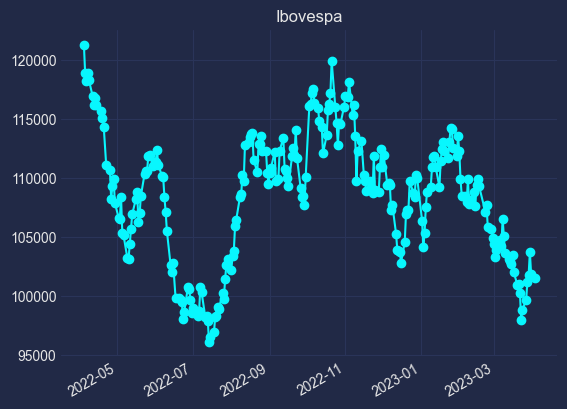

In [15]:
plt.style.use('cyberpunk')

dados_fechamento.plot(y = 'Ibovespa', use_index = True, marker='o', legend = False)

plt.title('Ibovespa')
plt.xlabel('')
plt.savefig('ibovespa.png', dpi = 300)

plt.show()

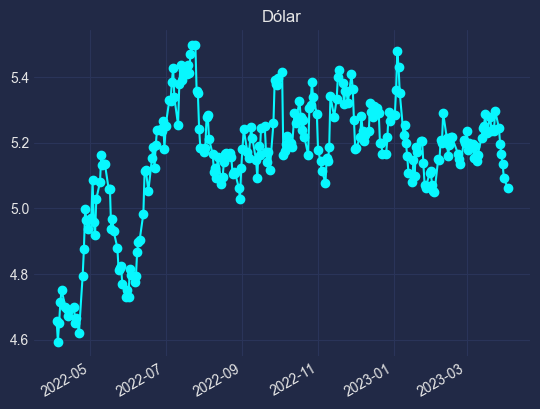

In [16]:
plt.style.use('cyberpunk')

dados_fechamento.plot(y = 'Dólar', use_index = True, marker='o', legend = False)

plt.title('Dólar')
plt.xlabel('')
plt.savefig('dolar.png', dpi = 300)

plt.show()

# Passo 7: Enviar e-mail
https://myaccount.google.com/apppasswords

In [19]:
import os
from dotenv import load_dotenv

In [20]:
load_dotenv()

True

In [24]:
senha = os.environ.get('senha')
email = 'rsdcruz97@gmail.com'

In [27]:
msg = EmailMessage()
msg['Subject'] = 'Enviando e-mail com o Python'
msg['From'] = 'rsdcruz97@gmail.com'
msg['To'] = 'brenno@varos.com.br'

msg.set_content(f''' Prezado diretor, segue o relatório diário:

Bolsa: 

No ano o Ibovespa está tendo uma rentabilidade de {retorno_anual_ibov}%, 
enquanto no mês a rentabilidade é de {retorno_mensal_ibov}%

No último dia útil, o fechamento do Ibovespa foi de {retorno_dia_ibov}%.


Dólar:

No ano o Dólar está tendo uma rentabilidade de {retorno_anual_dolar}%,
enquanto no mês a rentabilidade é de {retorno_mensal_dolar}%

No último dia útil, o fechamento do Dólar foi de {retorno_dia_dolar}%.


Abs, 

o melhor estudante de Python da Galaxia

Segue o link do codigo no GitHub: https://github.com/raphaelsoaresc/email-automatizado-python
... ''')

In [28]:
with open('dolar.png', 'rb') as content_file:
    content = content_file.read()
    msg.add_attachment(content, maintype='application', subtype='png', filename='dolar.png')
    
with open('ibovespa.png', 'rb') as content_file:
    content = content_file.read()
    msg.add_attachment(content, maintype='application', subtype='png', filename='dolar.png')

In [ ]:
with smtplib.SMTP_SSL('smtp.gmail.com', 465) as smtp:
    
    smtp.login('rsdcruz97@gmail.com', senha)
    smtp.send_message(msg)